In [1]:
import netCDF4
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import glob
from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines

In [2]:
sns.set_theme(context = 'paper',style='whitegrid',font_scale=2)

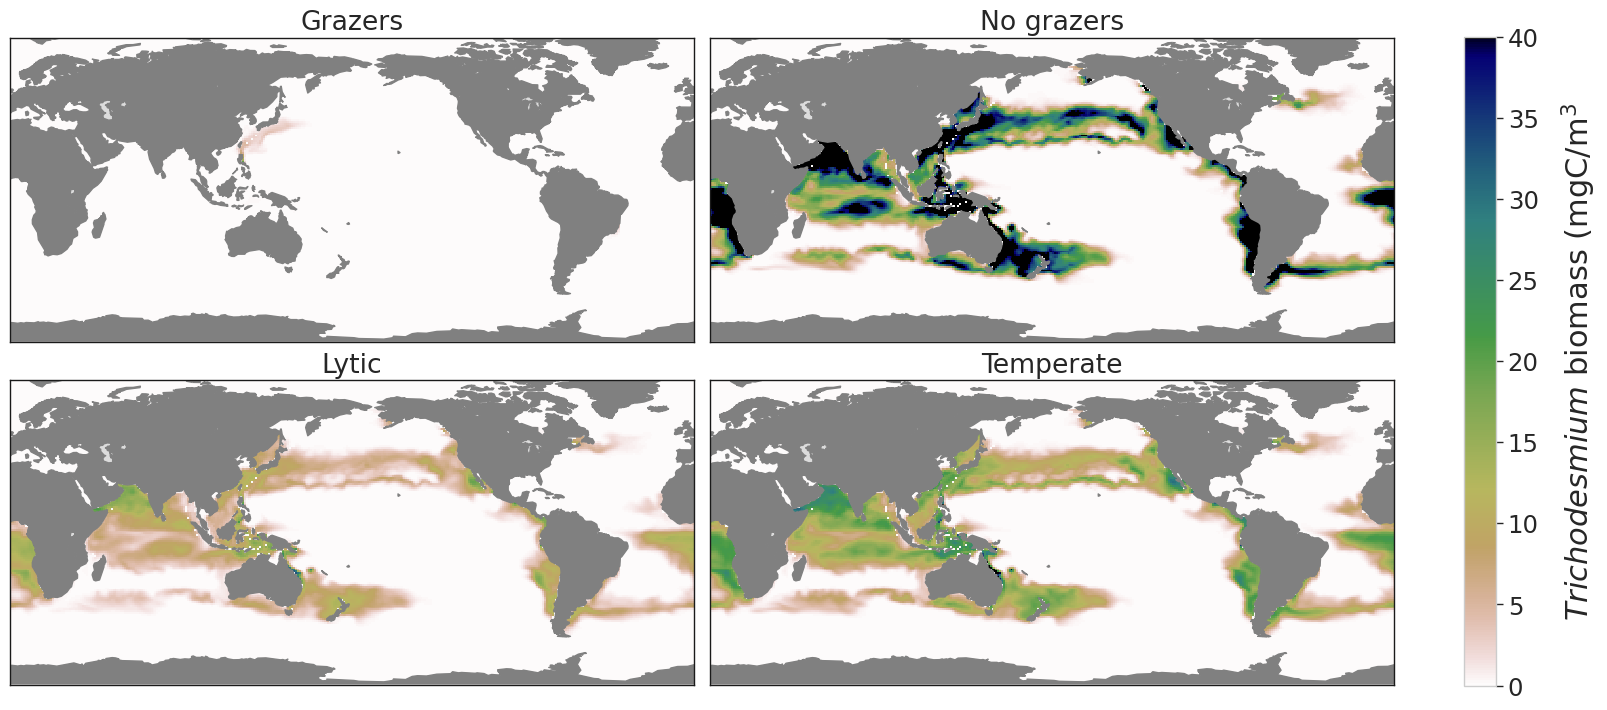

In [105]:
#Plot each model output
models_dict = {'A':'Grazers','B':'No grazers','C':'Lytic','D':'Temperate'}
fig, ax = plt.subplots(2,2,figsize=(16,7),constrained_layout=True)
axes=ax.ravel()
count = 0
for i in models_dict.keys():
    f = netCDF4.Dataset('model_output/tricho_run'+i+'.nc')
    biomass = f.variables['Tricho_biomass'][:].squeeze()
    biomass[np.isnan(biomass)] = 0
    lats, lons = f.variables['latitude'][:], f.variables['longitude'][:]
    latstep, lonstep = np.diff(lats[:2]), np.diff(lons[:2])
    lats = np.append(lats - 0.5 * latstep, lats[-1] + 0.5 * latstep)
    lons = np.append(lons - 0.5 * lonstep, lons[-1] + 0.5 * lonstep)
    lons, lats = np.meshgrid(lons,lats)

    m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=80,\
                llcrnrlon=0,urcrnrlon=360,resolution='c',ax=axes[count])
    m.drawmapboundary(fill_color='white')
    biomass_fill = m.pcolormesh(lons,lats,biomass,shading='flat',cmap=plt.cm.gist_earth_r,latlon=True,vmin=0,vmax=40)
    m.drawcoastlines(color='grey')
    m.fillcontinents(color='grey',lake_color='gainsboro')

    axes[count].set_title(models_dict[i])
    count += 1

cbar = fig.colorbar(biomass_fill,orientation='vertical', fraction = 0.025,ax=ax)
cbar.set_label(r'$\it{Trichodesmium }$ biomass (mgC/m$^{3}$', rotation=90, labelpad=15,fontsize=22)
plt.savefig('output_figures/fig4b_model_output.png',transparent=True,bbox_inches='tight')
plt.show()

In [4]:
#Repeat the above steps with the fraction biomass variable

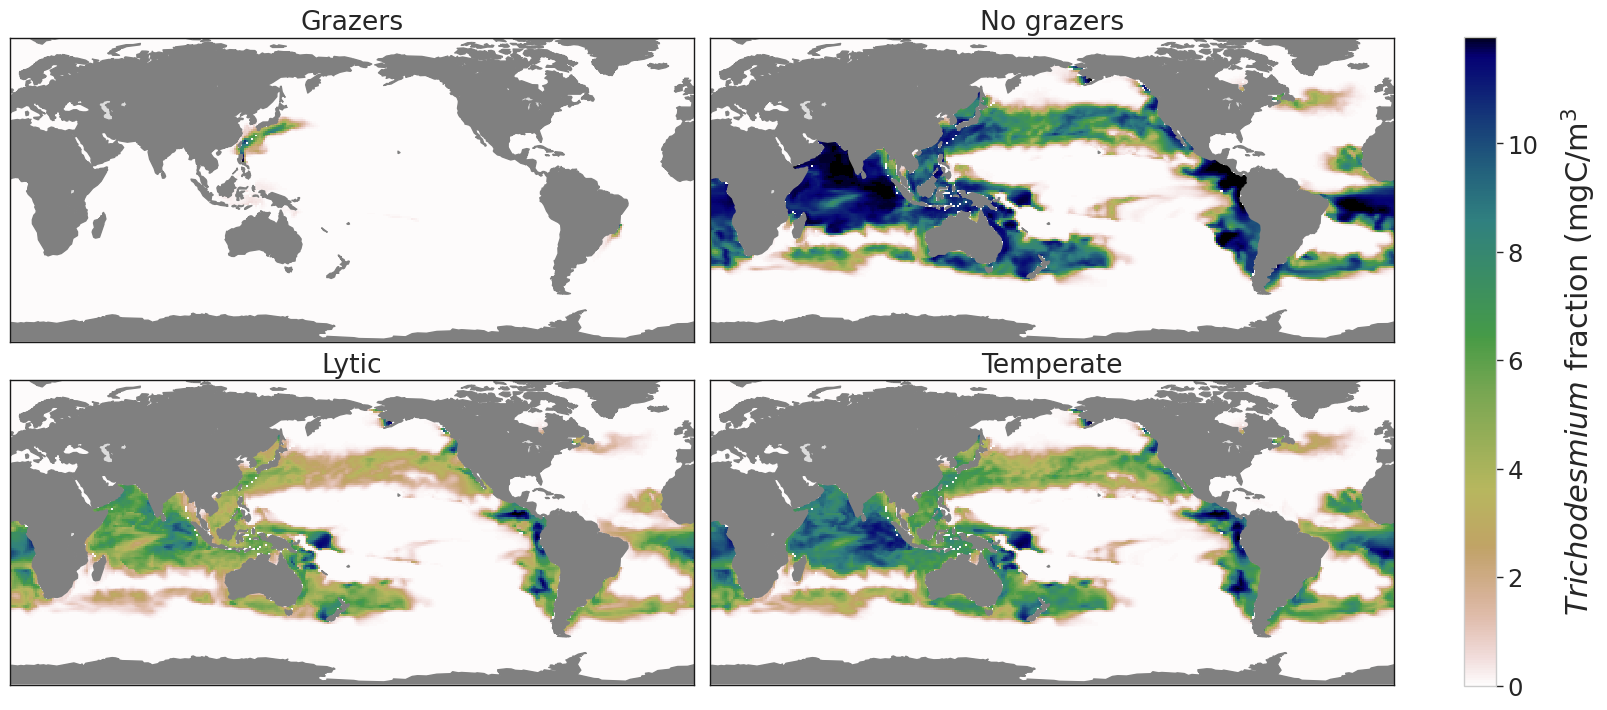

In [23]:
#Plot each model output
models_dict = {'A':'Grazers','B':'No grazers','C':'Lytic','D':'Temperate'}
fig, ax = plt.subplots(2,2,figsize=(16,7),constrained_layout=True)
axes=ax.ravel()
count = 0
for i in models_dict.keys():
    f = netCDF4.Dataset('model_output/tricho_run'+i+'.nc')
    fraction = f.variables['Tricho_fraction'][:].squeeze()
    fraction[np.isnan(fraction)] = 0
    lats, lons = f.variables['latitude'][:], f.variables['longitude'][:]
    latstep, lonstep = np.diff(lats[:2]), np.diff(lons[:2])
    lats = np.append(lats - 0.5 * latstep, lats[-1] + 0.5 * latstep)
    lons = np.append(lons - 0.5 * lonstep, lons[-1] + 0.5 * lonstep)
    lons, lats = np.meshgrid(lons,lats)

    m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=80,\
                llcrnrlon=0,urcrnrlon=360,resolution='c',ax=axes[count])
    m.drawmapboundary(fill_color='white')
    fraction_fill = m.pcolormesh(lons,lats,fraction,shading='flat',cmap=plt.cm.gist_earth_r,latlon=True,vmin=0)
    m.drawcoastlines(color='grey')
    m.fillcontinents(color='grey',lake_color='gainsboro')

    axes[count].set_title(models_dict[i])
    count += 1

cbar = fig.colorbar(fraction_fill,orientation='vertical', fraction = 0.025,ax=ax)
cbar.set_label(r'$\it{Trichodesmium }$ fraction (mgC/m$^{3}$', rotation=90, labelpad=15,fontsize=22)
plt.savefig('output_figures/suppfig10_model_output.png',transparent=True,bbox_inches='tight')
plt.show()